In [5]:
import io_utils 
!pip3 install seaborn
!pip3 install statsmodels
!pip3 install sklearn
!pip3 install lime

#standard python libraries
import datetime
import matplotlib.dates as mdates
import os

from math import factorial

## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
from lime import lime_tabular

Text(0.5, 0, 'UT on 6_22_2015')

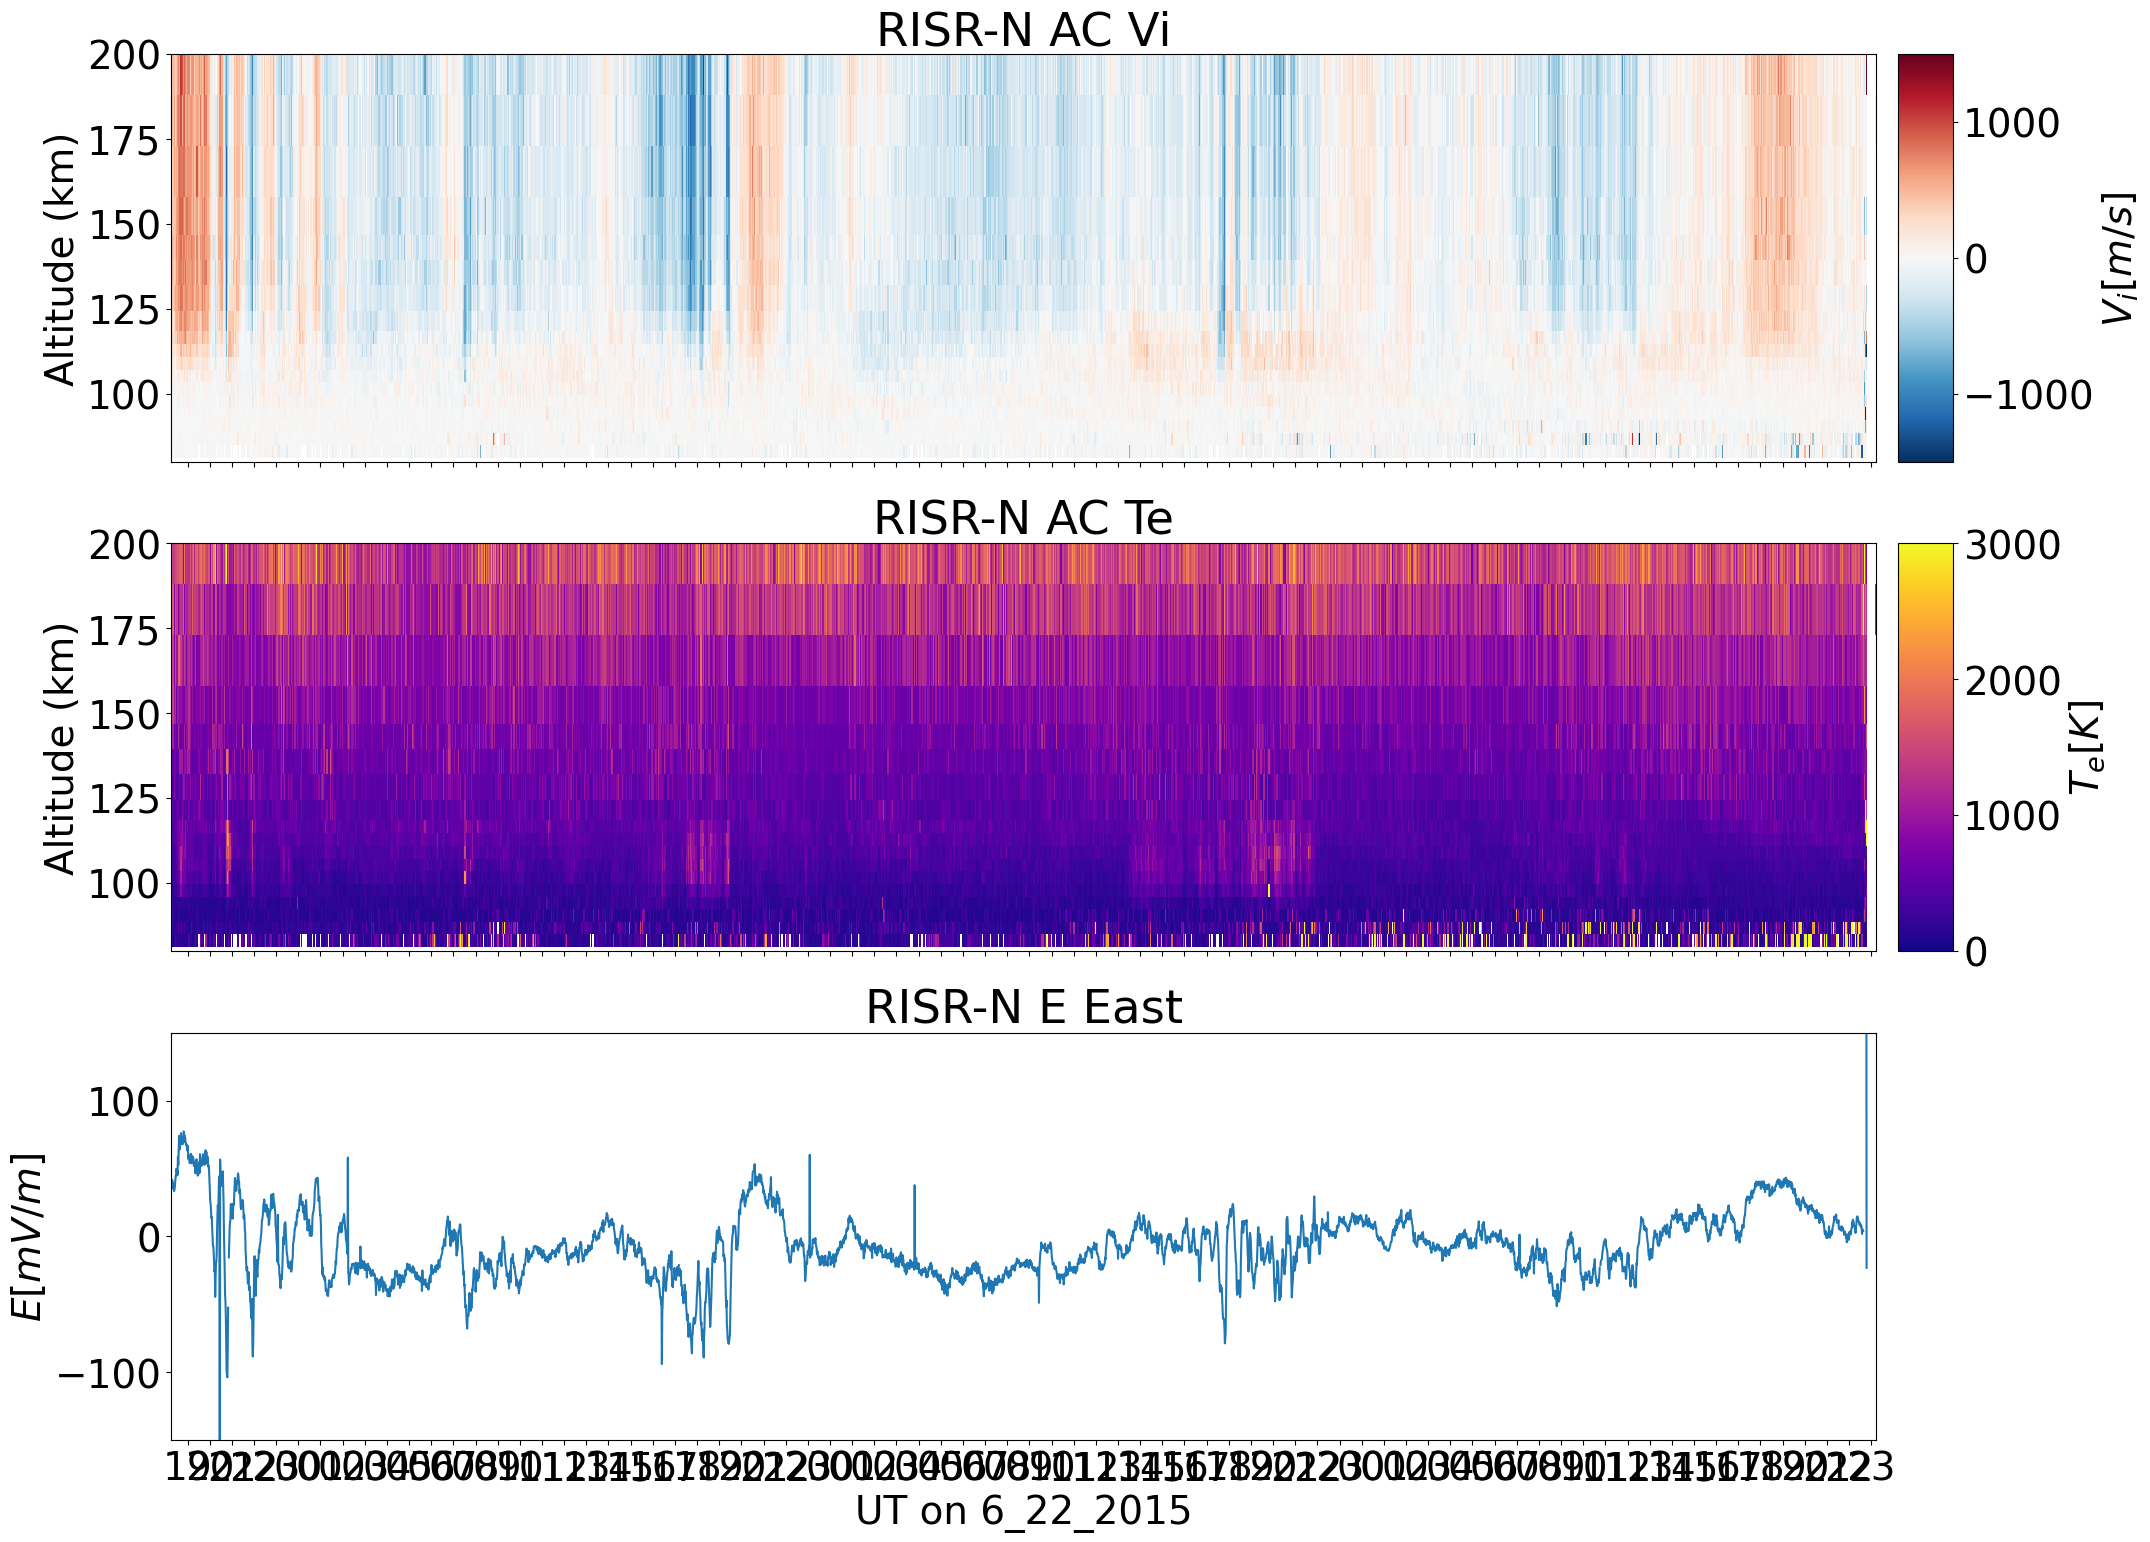

In [12]:
bplot = 5

#FB 6-22-2015

datadir = '/Users/alan/Downloads/AOS99/6_22_2015/'
lpfilename=datadir+'20150622.001_lp_1min-fitcal.h5'
# lpfilename = sys.argv[0]
flp=io_utils.read_whole_h5file(lpfilename)

#Alternating code data file
acfilename=datadir+'20150622.001_ac_3min-fitcal.h5'
# acfilename = sys.argv[1]
fac=io_utils.read_whole_h5file(acfilename)

#reconstructed vector velocities data file
vfilename=datadir+'20150622.001_lp_1min-fitcal-vvelsLat-60sec.h5'
# vfilename = sys.argv[2]
v=io_utils.read_whole_h5file(vfilename)

lp=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in flp['/Time']['UnixTime'][:,0]]
dtac=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in fac['/Time']['UnixTime'][:,0]]
dtv=[datetime.datetime(1970,1,1)+datetime.timedelta(seconds=int(t)) for t in v['/Time']['UnixTime'][:,0]]

plt.rcParams['figure.figsize']=22,18
plt.rcParams['font.size']=28
fig,axarr = plt.subplots(3,1,sharex=True)

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[0].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,0,-1].T,vmin=-1500,vmax=1500,cmap='RdBu_r')
axarr[0].set_title('RISR-N AC Vi')
axarr[0].set_ylabel('Altitude (km)')
axarr[0].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[0].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$V_{i} [m/s]$')

goodaltsac=np.logical_not(np.isnan(fac['/FittedParams']['Altitude'][bplot,:]))
acclrs=axarr[1].pcolormesh(mdates.date2num(dtac),fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3,fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T,vmin=0,vmax=3000,cmap='plasma')
axarr[1].set_title('RISR-N AC Te')
axarr[1].set_ylabel('Altitude (km)')
axarr[1].set_ylim([80,200])

#colorbar in its own axis
box2=axarr[1].get_position()
cbarax2=fig.add_axes([box2.x0+box2.width+0.01, box2.y0, 0.025, box2.height])
cb2=plt.colorbar(acclrs,cax=cbarax2)
cb2.set_label(r'$T_e [K]$')

axarr[-1].plot(mdates.date2num(dtv),v['/VectorVels']['Eest'][:,4,1].T*1e3)
axarr[-1].set_title('RISR-N E East')
axarr[-1].set_ylabel(r'$E [mV/m]$')
axarr[-1].set_ylim([-150,150])


# axarr[-1].set_xlim([mdates.date2num(datetime.datetime(2016,8,2,12,0,0)),mdates.date2num(datetime.datetime(2016,8,3,0,0,0))])
axarr[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H'))
axarr[-1].xaxis.set_major_locator(mdates.HourLocator())
axarr[-1].set_xlabel('UT on 6_22_2015')
#plt.savefig('FBExample.png',format='png',dpi=400,bbox_inches='tight')

In [7]:
dbf = pd.read_csv('2009_2022CompleteMag')

In [39]:
# mdates.date2num(dtac)
# fac['/FittedParams']['Altitude'][bplot,goodaltsac]*1e-3

print(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T)
print(len(fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1].T))

[[ 116.55842571  122.26778747  116.71350054 ...           nan
            nan           nan]
 [ 160.4815728   173.38236584  149.96647121 ...           nan
            nan           nan]
 [ 110.91948723  253.2508824   105.13889262 ...           nan
            nan           nan]
 ...
 [2827.69231145 2268.88021878 1378.58620312 ...           nan
            nan           nan]
 [1303.28863015 2804.08002309 3662.96544555 ...           nan
            nan           nan]
 [3599.67188975 3391.06409479 2917.19015937 ...           nan
            nan           nan]]
25


In [41]:
def magnitude(vector):
    return np.sqrt(sum(pow(element, 2) for element in vector))

h = []
w = []
# print(goodaltsac)
for i in fac['/FittedParams']['Fits'][:,bplot,goodaltsac,-1,1]:
    h.append(magnitude(i))
    # print(i)
    # if(dbf['Date_UTC'])
print(flp['/Time']['UnixTime'][:,0].T)
print(len(flp['/Time']['UnixTime'][:,0].T))
print(len(h))
data = {'DateTime' : flp['/Time']['UnixTime'][:,0].T, 'Temps': h}
dtf = pd.DataFrame(data)
dtf.head()

[1434997045 1434997106 1434997168 ... 1435273801 1435273863 1435273924]
4483
1495


ValueError: All arrays must be of the same length

In [ ]:
print(dtf['DateTime'][0])
dt = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[0])
dt2 = datetime.datetime.fromtimestamp(dtf['DateTime'].iloc[-1])
print(dt)
strdt = str(dt).replace(" ", "T")[:-2]+"00"
print(strdt)
print(dt2)
strdt2 = str(dt2).replace(" ", "T")[:-2]+"00"
print(strdt2)

start_time = dbf.index[dbf['Date_UTC'] == strdt].tolist()[0]
stop_time = dbf.index[dbf['Date_UTC'] == strdt2].tolist()[0]

print(start_time)
print(stop_time)

# print(dbf.index[dbf['Date_UTC'] == strdt].tolist())
# print(dbf.index[dbf['Date_UTC'] == strdt2].tolist())



In [ ]:
plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbn_nez'][start_time:stop_time])
plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbe_nez'][start_time:stop_time])
plt.plot(dbf['Date_UTC'][start_time:stop_time],dbf['dbz_nez'][start_time:stop_time])
plt.plot(dtf['Temps']/10-np.mean(dtf['Temps']/10))